<a href="https://colab.research.google.com/github/lcbjrrr/algojust/blob/main/NB02_selectionBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Selection bias**: Occurs when the data sample is not representative of the target population. This can happen due to non-random sampling, over- or underrepresentation of certain groups, or self-selection bias. For example, a study on the health effects of alcohol that only recruits participants from bars and nightclubs will not represent the general population's alcohol consumption habits.

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/algojust/refs/heads/main/census%20-%20USA.csv')

In [2]:
print(df.info())
print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73311 entries, 0 to 73310
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       73311 non-null  object 
 1   female      73311 non-null  int64  
 2   Race        73311 non-null  object 
 3   Citizen     73311 non-null  bool   
 4   Income      72901 non-null  float64
 5   Profession  73311 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 2.9+ MB
None

--- Descriptive Statistics for Numerical Columns ---
             female         Income
count  73311.000000   72901.000000
mean       0.261339   57225.564862
std        0.439367   28663.331962
min        0.000000    2611.000000
25%        0.000000   37683.000000
50%        0.000000   51094.000000
75%        1.000000   70117.000000
max        1.000000  248750.000000


Race
White       22856
Hispanic    21625
Asian       17045
Black        5724
Native       3773
Pacific      2288
Name: count, dtype: int64


<Axes: xlabel='Race'>

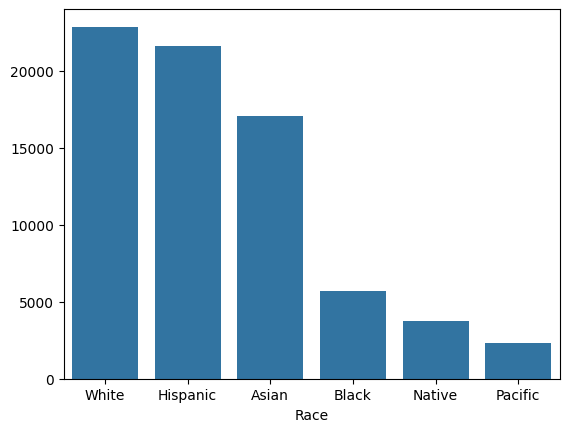

In [3]:
value_counts = df['Race'].value_counts()
print(value_counts)
sns.barplot(x=value_counts.index, y=value_counts.values)

Citizen
True     41983
False    31328
Name: count, dtype: int64


<Axes: xlabel='Citizen'>

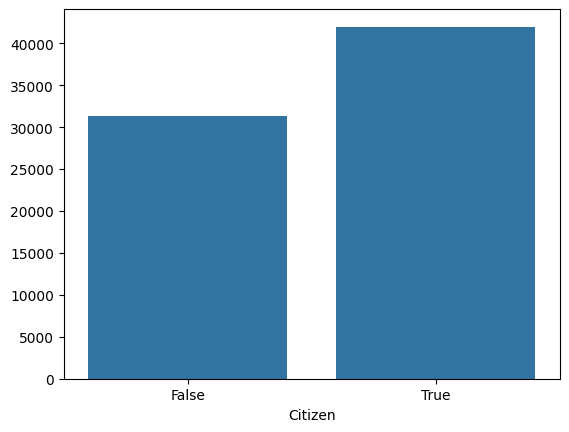

In [4]:
value_counts = df['Citizen'].value_counts()
print(value_counts)
sns.barplot(x=value_counts.index, y=value_counts.values)

Profession
PrivateWork     33080
SelfEmployed    20591
Unemployment     9189
PublicWork       7616
FamilyWork       2835
Name: count, dtype: int64


<Axes: xlabel='Profession'>

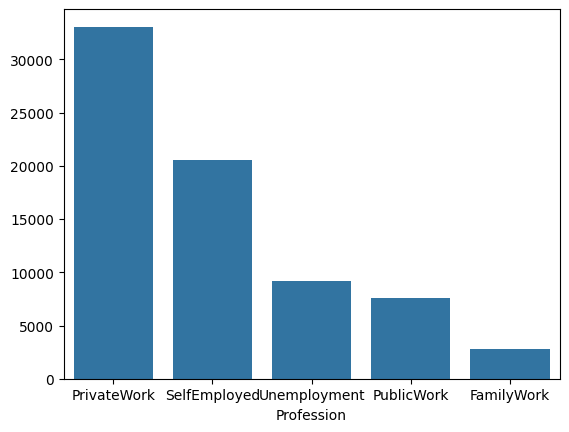

In [5]:
value_counts = df['Profession'].value_counts()
print(value_counts)
sns.barplot(x=value_counts.index, y=value_counts.values)

<ipython-input-6-1790767988>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Race', y='Income', data=df, palette='viridis')


<Axes: xlabel='Race', ylabel='Income'>

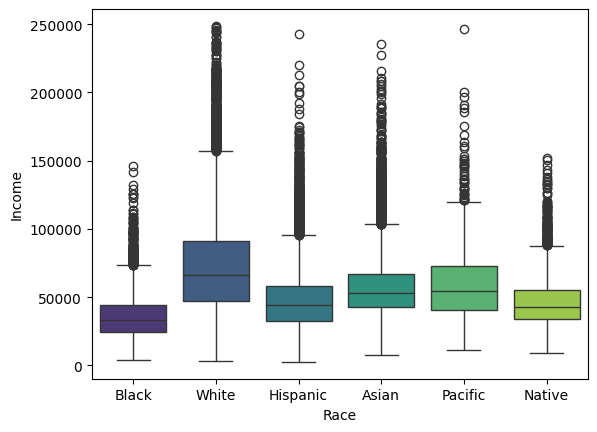

In [6]:
sns.boxplot(x='Race', y='Income', data=df, palette='viridis')


<ipython-input-7-2498879195>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profession', y='Income', data=df, palette='magma')


<Axes: xlabel='Profession', ylabel='Income'>

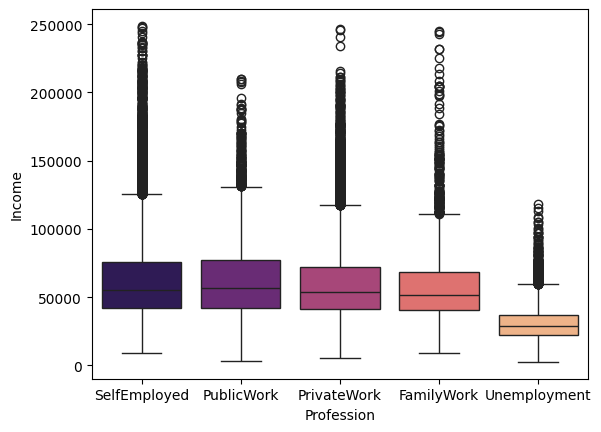

In [7]:
sns.boxplot(x='Profession', y='Income', data=df, palette='magma')


<ipython-input-8-970253807>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Citizen', y='Income', data=df, palette='cividis')


<Axes: xlabel='Citizen', ylabel='Income'>

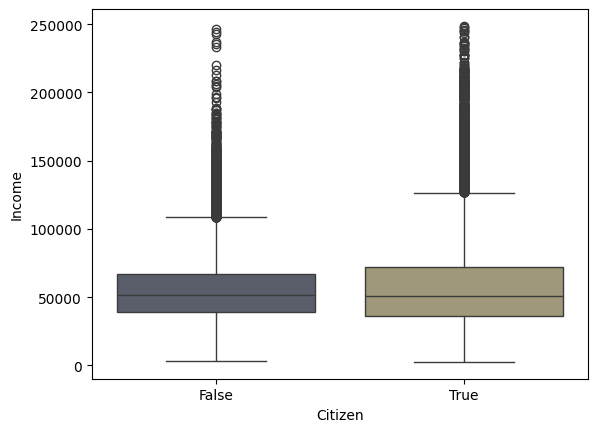

In [8]:
sns.boxplot(x='Citizen', y='Income', data=df, palette='cividis')

Profession FamilyWork PrivateWork PublicWork SelfEmployed Unemployment
Race                                                                  
Asian            5.1%      47.82%       7.7%       35.85%        3.53%
Black           2.46%      29.82%      15.2%       11.51%        41.0%
Hispanic        3.87%      42.35%      9.26%       26.31%       18.22%
Native          5.27%      36.26%     13.97%       30.53%       13.97%
Pacific         2.84%      43.71%     14.95%       26.44%       12.06%
White           3.17%      51.17%     11.21%       27.89%        6.56%


<Axes: xlabel='Race'>

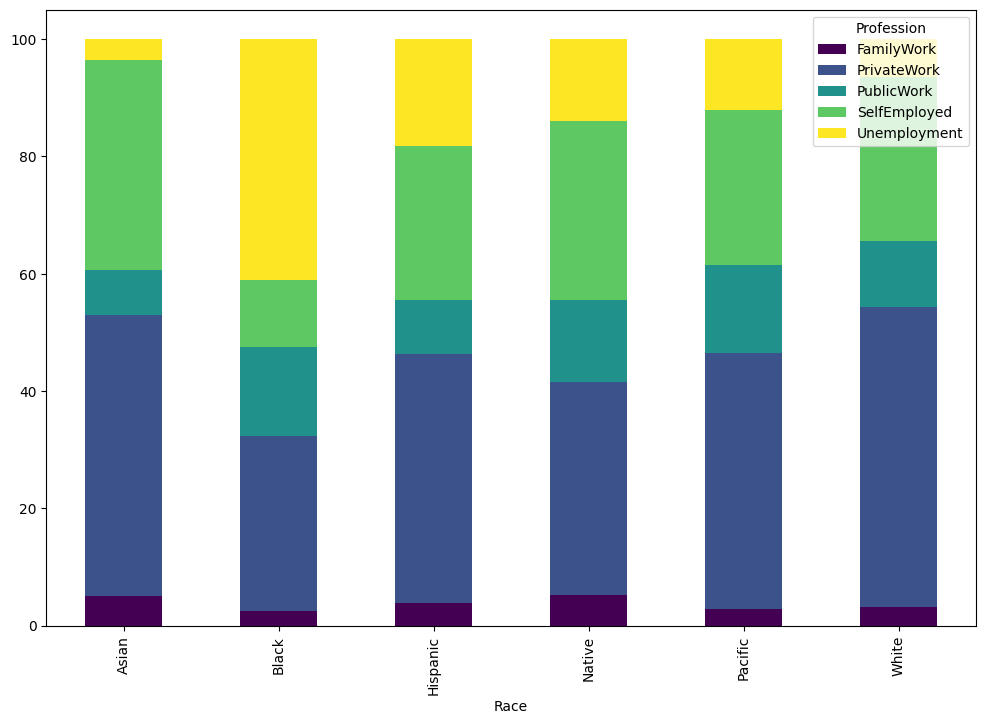

In [9]:
crosstab_race_profession = pd.crosstab(df['Race'], df['Profession'], normalize='index').mul(100).round(2)
print(crosstab_race_profession.astype(str) + '%')

# Stacked bar chart for Race vs. Profession
crosstab_race_profession.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')